In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
# importing the dataset
df_train = pd.read_csv('C:\\Users\\CWC\\Downloads\\archive (1)\\train.csv')
df_train.shape

(550068, 12)

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_test = pd.read_csv('C:\\Users\\CWC\\Downloads\\archive (1)\\test.csv')
# df_test.head()
df_test.shape

(233599, 11)

In [5]:
df = pd.concat([df_train, df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
df.shape

(783667, 12)

In [7]:
df_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [8]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
df.drop(['User_ID'], axis=1, inplace=True)
# When you use inplace=True, you don't need to assign it to itself

In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
pd.get_dummies(df['Gender'])

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,1,0


In [14]:
# Handling categorical feature : GENDER
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
# Handling categorical feature : AGE
age_cat = df['Age'].unique()

<Axes: xlabel='Age'>

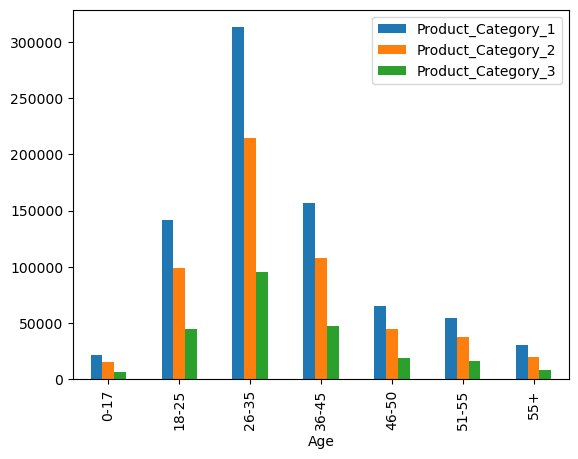

In [16]:
df.groupby('Age').count()[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].plot(kind='bar')

In [17]:
# mapped the age ranges sequentially
df['Age'] = df['Age'].map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [18]:
df.City_Category.unique()

df_city = pd.get_dummies(df['City_Category'], drop_first=True)
# we dropped the first column even though there are 3 categories because two are enough to 
# represent the all of them i.e. if B and C are 0 then we'll automatically know that A is 1.
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [19]:
df = pd.concat([df, df_city], axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [20]:
df = df.drop(columns=['City_Category'])

In [21]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [22]:
## Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [23]:
## Focus on replacing missing values
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [24]:
df['Product_Category_1'].value_counts()
## We are going to replace Missing Values with the mode of the data

5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64

In [25]:
df['Product_Category_1'].mode()

df['Product_Category_3'].mode()[0]
# somehow for categories 2 and 3, simply using .mode() isn't working. You need to specify the element

16.0

In [26]:
df['Product_Category_1'] = df['Product_Category_1'].fillna(df['Product_Category_1'].mode())

df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [27]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [28]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace("+","")

C:\Users\CWC\AppData\Local\Temp\ipykernel_12560\3496786992.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace("+","")


In [29]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [30]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int64')

In [31]:
df[['B','C']] = df[['B','C']].astype('int64')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

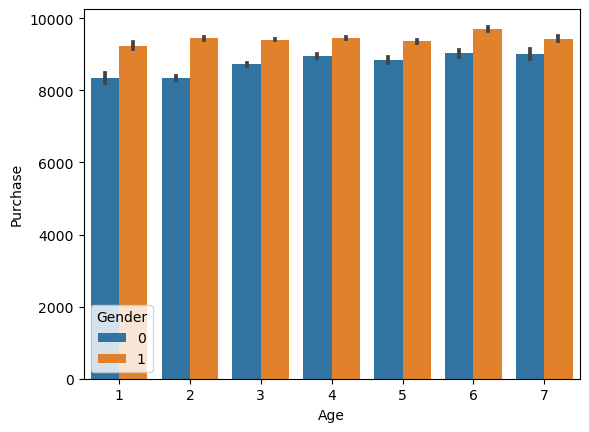

In [33]:
## Visualization
# sns.pairplot(df)
sns.barplot(x='Age',y='Purchase', hue='Gender', data=df)

#### This looks like a pretty normal distribution based on purchases by different age groups.
#### Also, purchases by male is a little higher.

<Axes: xlabel='Occupation', ylabel='Purchase'>

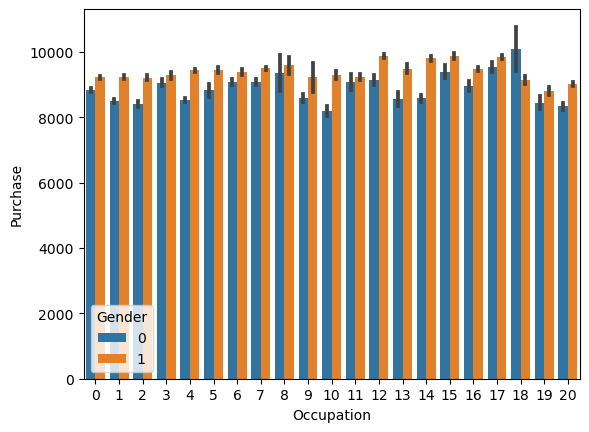

In [34]:
# Visualization of purchases by occupation
sns.barplot(x='Occupation',y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

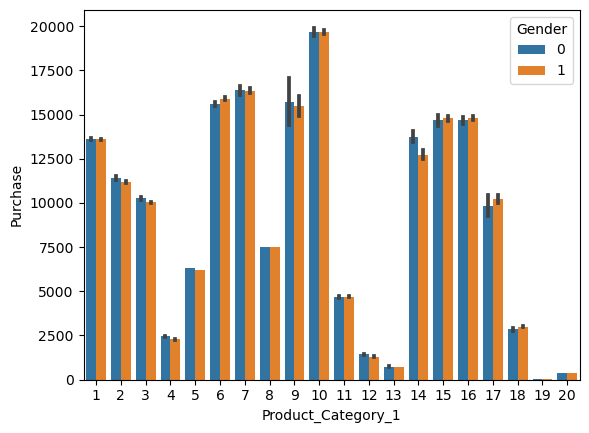

In [35]:
sns.barplot(x='Product_Category_1',y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

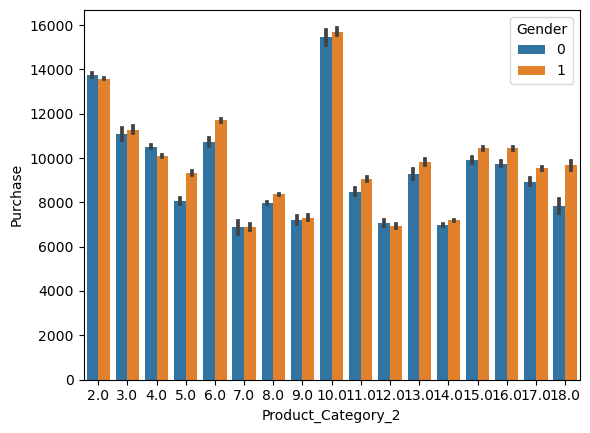

In [36]:
sns.barplot(x='Product_Category_2',y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

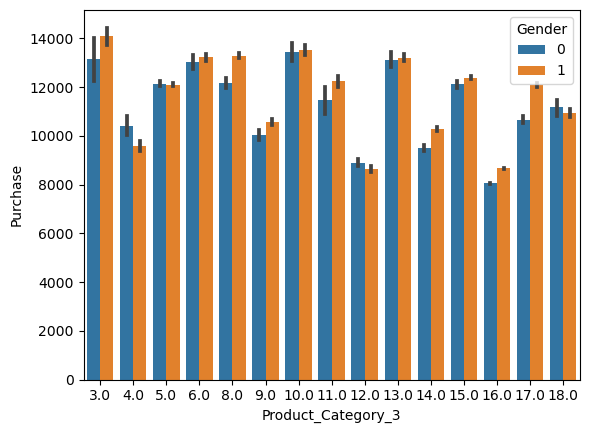

In [37]:
sns.barplot(x='Product_Category_3',y='Purchase', hue='Gender', data=df)

# MODEL BUILDING

In [38]:
# df.columns
columns = ['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'B', 'C', 'Purchase']
df = df[columns]

In [39]:
df = df.drop(['Product_ID'], axis=1)

In [40]:
df_test = df[df['Purchase'].isnull()]

In [41]:
df_train = df[~df['Purchase'].isnull()]
df_train.shape

(550068, 11)

In [42]:
# df_test
y = df_train.iloc[:,-1]
X = df_train.iloc[:,:-1]


X.shape

(550068, 10)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
## Train your model